In [1]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have downloaded and installed FedScale
from fedscale.dataloaders.femnist import FEMNIST
from fedscale.dataloaders.utils_data import get_data_transform
from fedscale.dataloaders.divide_data import DataPartitioner
from fedscale.core.config_parser import args

In [2]:
train_transform, test_transform = get_data_transform('mnist')
train_dataset = FEMNIST('./benchmark/dataset/data/femnist', dataset='train', transform=train_transform)
test_dataset = FEMNIST('./benchmark/dataset/data/femnist', dataset='test', transform=test_transform)

In [3]:
args.task = 'cv'
training_sets = DataPartitioner(data=train_dataset, args=args, numOfClass=62)
training_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')
#testing_sets = DataPartitioner(data=test_dataset, args=args, numOfClass=62, isTest=True)
#testing_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')

In [4]:
print(f'Total number of data samples: {training_sets.getDataLen()}')
print(f'Total number of clients: {training_sets.getClientLen()}')

Total number of data samples: 637877
Total number of clients: 2800


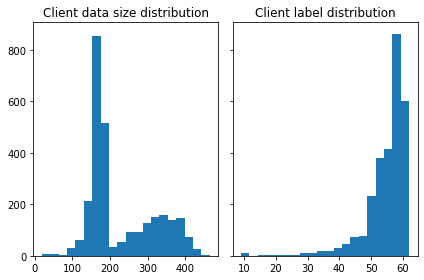

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
size_dist = training_sets.getSize()['size']

n_bins = 20
axs[0].hist(size_dist, bins=n_bins)
axs[0].set_title('Client data size distribution')

label_dist = training_sets.getClientLabel()
axs[1].hist(label_dist, bins=n_bins)
axs[1].set_title('Client label distribution')

plt.show()

In [6]:
rank=1
isTest = False
dropLast =  True
partition = training_sets.use(rank - 1, isTest)
num_loaders = min(int(len(partition)/ args.batch_size/2),  args.num_loaders)
dataloader = DataLoader(partition, batch_size=16, shuffle=True, pin_memory=True, timeout=60, num_workers=num_loaders, drop_last=dropLast)

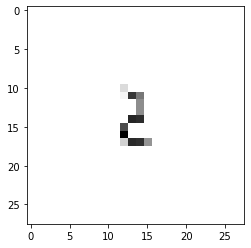

In [7]:
for data in iter(dataloader):
   plt.imshow(np.transpose(data[0][0].numpy(), (1, 2, 0)))
   break

In [13]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have downloaded and installed FedScale
from fedscale.dataloaders.wisdm import WISDM
from fedscale.dataloaders.pamap2 import PAMAP2
from fedscale.dataloaders.utils_data import get_data_transform
from fedscale.dataloaders.divide_data import DataPartitioner
from fedscale.core.config_parser import args

In [14]:
# train_transform, test_transform = get_data_transform('mnist')
train_dataset = PAMAP2('./benchmark/dataset/data/PAMAP2', dataset='train')
test_dataset = PAMAP2('./benchmark/dataset/data/PAMAP2', dataset='test')

In [15]:
args.task = 'har'
training_sets = DataPartitioner(data=train_dataset, args=args, numOfClass=25)
training_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/PAMAP2/client_data_mapping/train.csv')

In [16]:
print(f'Total number of data samples: {training_sets.getDataLen()}')
print(f'Total number of clients: {training_sets.getClientLen()}')

Total number of data samples: 23016
Total number of clients: 9


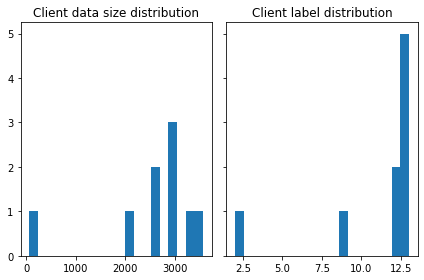

In [17]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
size_dist = training_sets.getSize()['size']

n_bins = 20
axs[0].hist(size_dist, bins=n_bins)
axs[0].set_title('Client data size distribution')

label_dist = training_sets.getClientLabel()
axs[1].hist(label_dist, bins=n_bins)
axs[1].set_title('Client label distribution')

plt.show()

In [11]:
rank=1
isTest = False
dropLast =  True
partition = training_sets.use(rank - 1, isTest)
num_loaders = min(int(len(partition)/ args.batch_size/2),  args.num_loaders)
dataloader = DataLoader(partition, batch_size=16, shuffle=True, pin_memory=True, timeout=60, num_workers=num_loaders, drop_last=dropLast)

In [7]:
for data in iter(dataloader):
   print(data[0][0])
   break

tensor([ 2.5734e+03,  1.2300e+02,  3.2438e+01, -9.5862e+00, -1.6364e+00,
         1.0047e+00, -9.4862e+00, -1.6840e+00,  1.2188e+00, -3.5480e-02,
        -3.9672e-03, -4.2893e-03,  3.3920e+01,  1.5446e+01, -5.8184e+00,
         4.6783e-01, -4.2641e-01, -4.9476e-01,  5.9541e-01,  3.7062e+01,
        -2.5231e-01,  9.8050e+00, -1.3925e-01, -3.6467e-01,  9.8206e+00,
         3.1528e-01, -1.7784e-02,  3.3965e-02, -9.8106e-03,  1.8499e+01,
        -2.5908e+01, -1.5926e+00,  7.2332e-01, -6.8971e-01, -1.8026e-02,
         2.7708e-02,  3.2750e+01,  9.4800e+00, -9.8760e-03, -3.1207e+00,
         9.4812e+00,  4.4629e-02, -2.7374e+00,  1.0068e-02,  1.3417e-02,
        -9.1533e-04, -2.1860e+01,  8.4908e+00,  2.4684e+01,  1.3533e-01,
         7.8281e-01,  1.7824e-01,  5.8062e-01])
